In [1]:

import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_excel(r"C:\Users\91742\Downloads\titanic.xlsx")

In [5]:
df

PassengerId                                               Name  Pclass  \
0              1                            Braund, Mr. Owen Harris       3   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2              3                             Heikkinen, Miss. Laina       3   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4              5                           Allen, Mr. William Henry       3   
..           ...                                                ...     ...   
886          887                              Montvila, Rev. Juozas       2   
887          888                       Graham, Miss. Margaret Edith       1   
888          889           Johnston, Miss. Catherine Helen "Carrie"       3   
889          890                              Behr, Mr. Karl Howell       1   
890          891                                Dooley, Mr. Patrick       3   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 12 columns]

In [6]:

df.columns


Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [7]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [8]:
df

Pclass     Sex   Age     Fare  Survived
0         3    male  22.0   7.2500         0
1         1  female  38.0  71.2833         1
2         3  female  26.0   7.9250         1
3         1  female  35.0  53.1000         1
4         3    male  35.0   8.0500         0
..      ...     ...   ...      ...       ...
886       2    male  27.0  13.0000         0
887       1  female  19.0  30.0000         1
888       3  female   NaN  23.4500         0
889       1    male  26.0  30.0000         1
890       3    male  32.0   7.7500         0

[891 rows x 5 columns]

In [9]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [10]:
df.Age=df.Age.fillna(df.Age.mean())

In [13]:
df1=df.copy()

In [14]:
dummies=pd.get_dummies(df.Sex)

In [15]:
dummies

female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[891 rows x 2 columns]

In [16]:
df.Sex=df.Sex.map({'female':0,'male':1})

In [17]:
df

Pclass  Sex        Age     Fare  Survived
0         3    1  22.000000   7.2500         0
1         1    0  38.000000  71.2833         1
2         3    0  26.000000   7.9250         1
3         1    0  35.000000  53.1000         1
4         3    1  35.000000   8.0500         0
..      ...  ...        ...      ...       ...
886       2    1  27.000000  13.0000         0
887       1    0  19.000000  30.0000         1
888       3    0  29.699118  23.4500         0
889       1    1  26.000000  30.0000         1
890       3    1  32.000000   7.7500         0

[891 rows x 5 columns]

In [18]:
target=df.Survived

In [19]:
xt=df.drop(['Survived'],axis=1)

In [20]:
xt

Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    0  38.000000  71.2833
2         3    0  26.000000   7.9250
3         1    0  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    0  19.000000  30.0000
888       3    0  29.699118  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]

In [21]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(xt,target,test_size=0.2)

In [27]:
len(xtrain)

712

In [29]:
len(xtest)

179

In [30]:
len(xt)

891

In [31]:
from sklearn.naive_bayes import GaussianNB


In [32]:
model=GaussianNB()

In [34]:
model.fit(xtrain, ytrain)

GaussianNB()

In [35]:
model.score(xtest,ytest)

0.7932960893854749

In [36]:
ypred=model.predict(xtest)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm=confusion_matrix(ytest,ypred)

In [39]:

cm

array([[86, 22],
       [15, 56]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

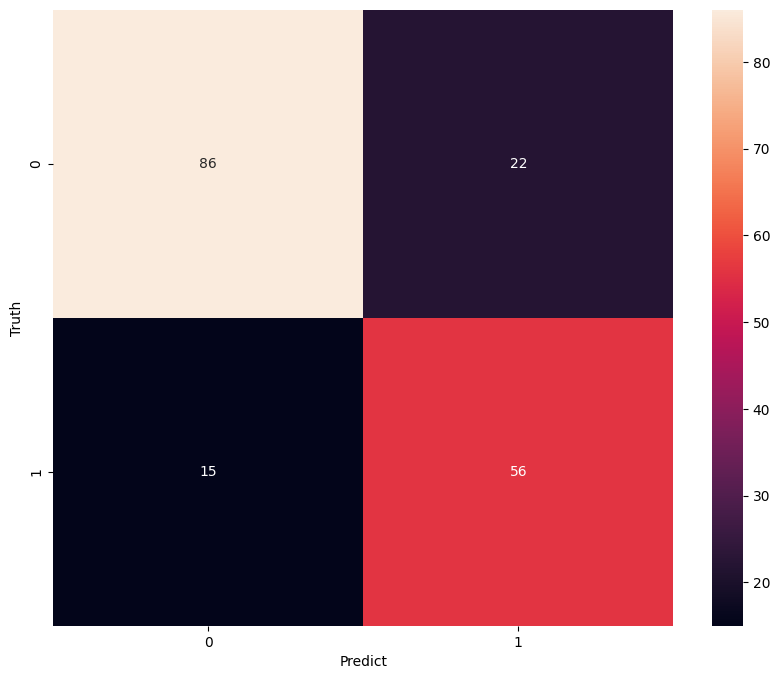

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')